EDA - 1
Title: Bike Details Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [412]:
df = pd.read_csv('BIKE DETAILS.csv') 

In [414]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [536]:
#Q1.  What is the range of selling prices in the dataset.
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
"""
Ans1. From above Five point summary, the minimum selling price is 5000 and maximum selling price is 760000.
      This confirms the selling price is 5000 to 760000.
"""

In [37]:
#Q2. What is the median selling price for bikes in the dataset
df['selling_price'].median()
# the median is 45000

45000.0

In [46]:
#Q3. What is the most common seller type.
df['seller_type'].value_counts()
#Ans3. The most common seller type is Individual.

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [80]:
#Q4.  How many bikes have driven more than 50,000 kilometers.
count = df[df['km_driven'] > 50000]['km_driven'].count()
print(f'{count} bikes have driven more than 50000 kilometers')


170 bikes have driven more than 50000 kilometers


In [86]:
#Q5.What is the average km_driven value for each ownership type?
df.groupby(['owner'])['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [118]:
#Q6  What proportion of bikes are from the year 2015 or older?
df_copy = df[df['year'] <= 2015]

In [120]:
df_copy['year'].value_counts(normalize = True) * 100

year
2015    16.638935
2014    15.141431
2013    12.146423
2012    11.647255
2011    10.149750
2010     9.983361
2007     4.825291
2008     4.658902
2009     4.658902
2006     3.327787
2005     2.329451
2000     0.998336
2004     0.831947
2002     0.499168
1998     0.499168
1997     0.332779
2001     0.332779
1988     0.166389
1999     0.166389
1991     0.166389
2003     0.166389
1993     0.166389
1995     0.166389
Name: proportion, dtype: float64

In [336]:
#Q7 What is the trend of missing values across the dataset?
df.isnull().sum()
#ans7. Only in ex_showroom price column 435 are null values.

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

<Axes: >

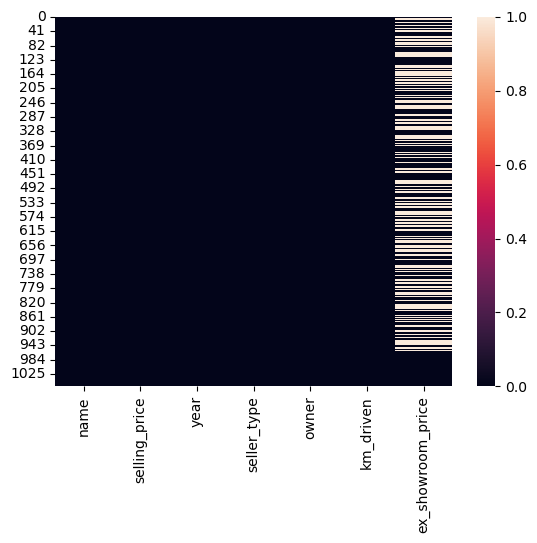

In [338]:
# by viualization we can see that in ex_showroom proce there is some null values.
sns.heatmap(df.isnull())


In [340]:
#Q8  What is the highest ex_showroom_price recorded, and for which bike?
df['ex_showroom_price'].fillna(0,inplace = True)
maxpri =df['ex_showroom_price'].max()

In [342]:
maxpri

1278000.0

In [344]:
df[df['ex_showroom_price'] == maxpri]['name']

134    Harley-Davidson Street Bob
Name: name, dtype: object

In [346]:
#Q9. What is the total number of bikes listed by each seller type?
df.groupby(['seller_type'])['name'].count()

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

In [260]:
#Q10. What is the relationship between selling_price and km_driven for first-owner bikes?
df1 = df[df['owner'] == '1st owner']

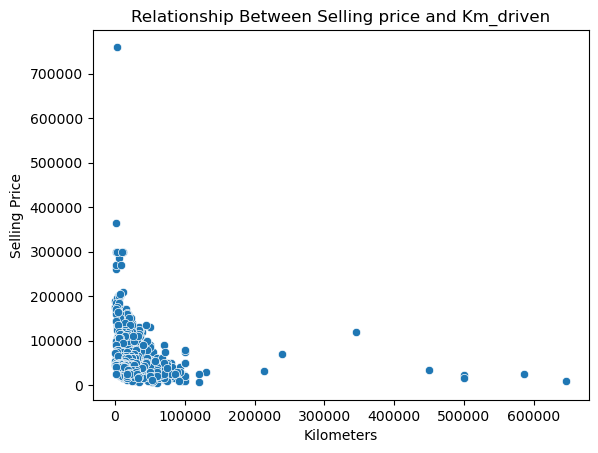

In [348]:
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = df1)
plt.title("Relationship Between Selling price and Km_driven")
plt.ylabel('Selling Price')
plt.xlabel('Kilometers')
plt.show()

<Axes: ylabel='km_driven'>

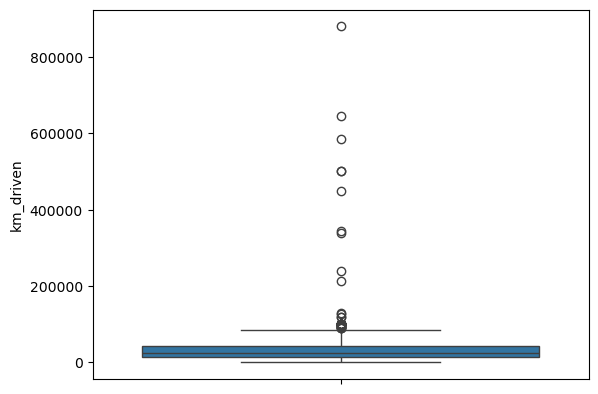

In [285]:
#Q11. Identify and remove outliers in the km_driven column using the IQR method
sns.boxplot(df['km_driven'])

In [291]:
# IQR = Q3-Q1
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

In [295]:
IQR = Q3 - Q1

In [366]:
lowerfence = Q1 - 1.5 * IQR
upperfence = Q3 + 1.5 * IQR

In [378]:
df2 = df[(df.km_driven >= lowerfence) & (df.km_driven <= upperfence)]

<Axes: ylabel='km_driven'>

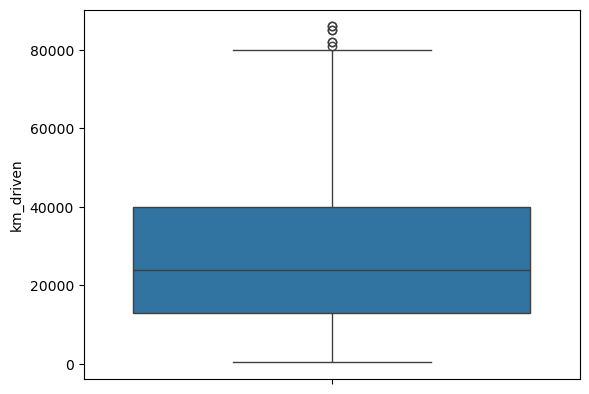

In [382]:
sns.boxplot(df2['km_driven'])

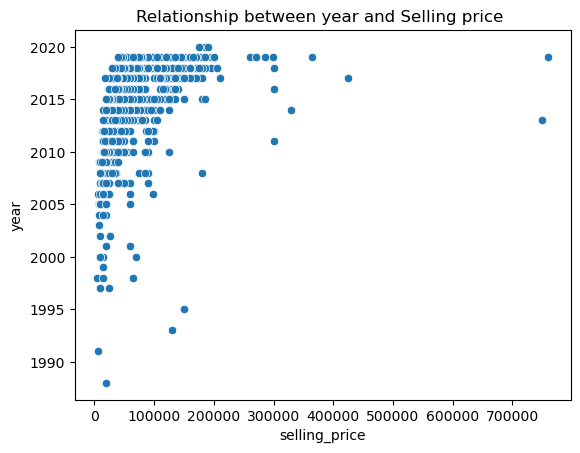

In [442]:
#Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price
sns.scatterplot(x= 'selling_price', y= 'year', data = df)
plt.title("Relationship between year and Selling price ")
plt.show()


In [434]:
# In bivarate analysis, we can visualize the average selling price among years
df3 = df.groupby(['year'])['selling_price'].mean().reset_index()

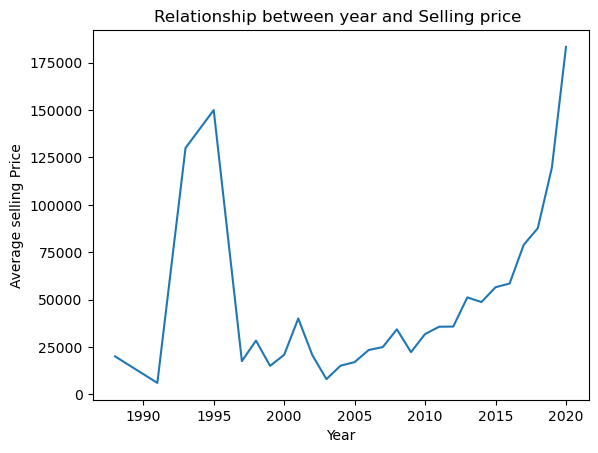

In [444]:
sns.lineplot(df3, x = 'year', y = 'selling_price')
plt.title("Relationship between year and Selling price ")
plt.xlabel('Year')
plt.ylabel("Average selling Price")
plt.show()

In [ ]:
#Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [395]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [452]:
df['Bike_age'] = (2025- df['year'])

In [460]:
dfbike = df.groupby(['Bike_age'])['selling_price'].mean().reset_index()

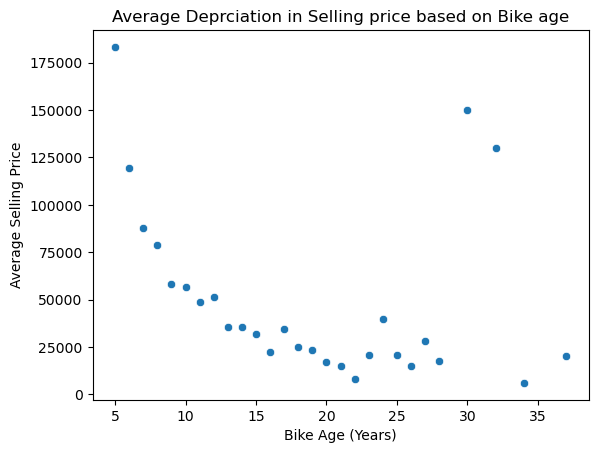

In [481]:
sns.scatterplot(dfbike, x = 'Bike_age', y = 'selling_price')
plt.title('Average Deprciation in Selling price based on Bike age')
plt.xlabel('Bike Age (Years)')
plt.ylabel("Average Selling Price")
plt.show()

In [483]:
#Q14. Which bike names are priced significantly above the average price for their manufacturing year

In [489]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,Bike_age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,0.0,6
1,Honda Dio,45000,2017,Individual,1st owner,5650,0.0,8
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,0.0,14


In [542]:
dfnew = df.groupby('year')['selling_price'].mean().reset_index()
dfnew.rename(columns = {'selling_price' : 'avg_selling_price'},inplace = True)

In [544]:
df= df.merge(dfnew, on = 'year', how = 'left' )

In [553]:
df_above_average = df[df.selling_price > df.avg_selling_price]

In [555]:
df_above_average

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,avg_selling_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,119689.511628
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,56500.000000
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,34289.285714
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,119689.511628
...,...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,58469.018692
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,48668.131868
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,35748.400000
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,48668.131868


In [ ]:
#Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [416]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [422]:
num_col = df[['selling_price','km_driven','ex_showroom_price']]

In [426]:
corr_matrix = num_col.corr()

Text(0.5, 1.0, 'Correlation matrix of numeric columns')

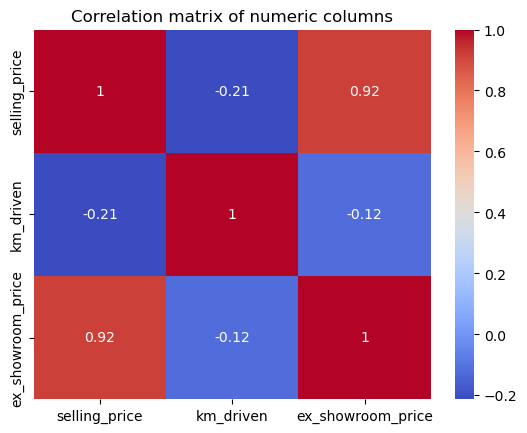

In [438]:
sns.heatmap(corr_matrix, annot = True, cmap  = 'coolwarm')
plt.title('Correlation matrix of numeric columns')

In [ ]:
#EDA2 - CAR SALE DATASET

In [378]:
df1 = pd.read_csv("Car sale.csv")

In [380]:
df1.rename(columns = {'Price ($)' : 'Price'},inplace = True)

In [382]:
#Q1.  What is the average selling price of cars for each dealer, and how does it compare across different dealers
q1=df1.groupby(['Dealer_Name'])['Price'].mean().sort_values(ascending = False).reset_index()

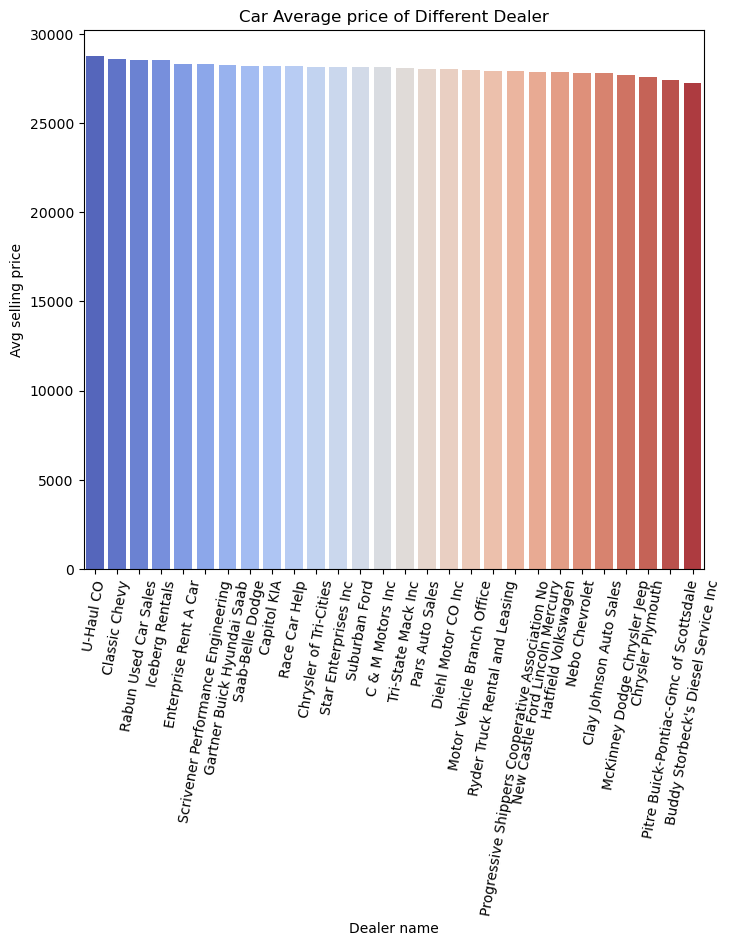

In [9]:
plt.figure(figsize=(8,7))
sns.barplot(x  = 'Dealer_Name', y = 'Price', data = q1, palette= 'coolwarm' )
plt.title("Car Average price of Different Dealer") 
plt.xlabel("Dealer name")
plt.ylabel("Avg selling price")
plt.xticks(rotation = 80)
plt.show()

In [157]:
#Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [155]:
df1.groupby(['Company'])['Price'].std().sort_values(ascending = False ).reset_index()

,Company,Price
0,Lincoln,19658.050211
1,Saab,19653.740089
2,Cadillac,19517.120220
3,Plymouth,19065.997338
4,Lexus,17852.923492
5,Buick,17142.232626
6,Mercury,16445.172195
7,Nissan,16214.264017
8,Saturn,15990.223671
9,Ford,15849.090227


In [ ]:
#insights 
#Company like Lincoln,Saab has high price variation likly offers a wide range of models, from budget
#frindly to luxury ones.
#Copany with lower variation may focused on strategy, ppossibly targeting specific demographic.

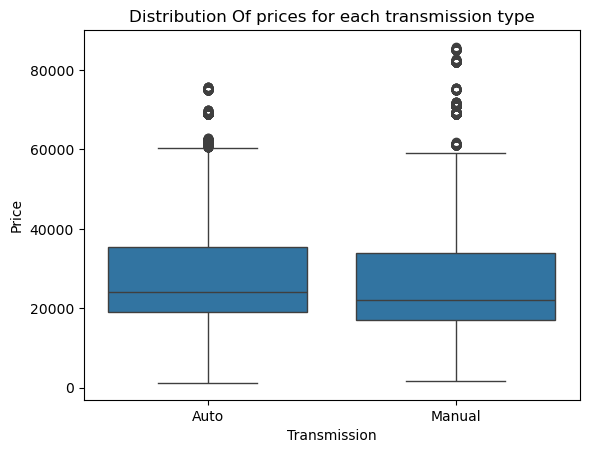

In [196]:
#Q3.  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(x = 'Transmission',y = 'Price', data = df1)
plt.title("Distribution Of prices for each transmission type")
plt.show()

In [177]:
qus3 = df1.groupby(['Transmission'])['Price'].describe()

In [179]:
qus3

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [185]:
IQR = qus3['75%']-qus3['25%']

In [187]:
IQR

Transmission
Auto      16500.0
Manual    17000.0
dtype: float64

In [189]:
#insights
#.Higher Iqr in tramission type may cater broder range of customers, icluding budget buyers or luxury buyers
#.Lower IQR in transmission type focus on narrow range, with some targated audience.

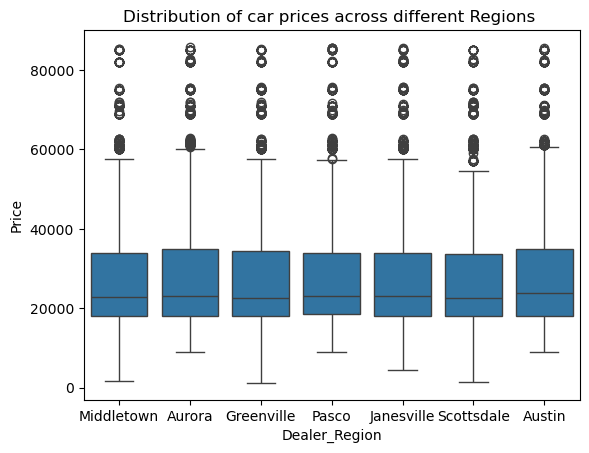

In [209]:
#Q4.  What is the distribution of car prices across different regions
sns.boxplot(x = 'Dealer_Region',y = 'Price', data = df1)
plt.title('Distribution of car prices across different Regions ')
plt.show()

In [ ]:
#Q5.  What is the distribution of cars based on body styles

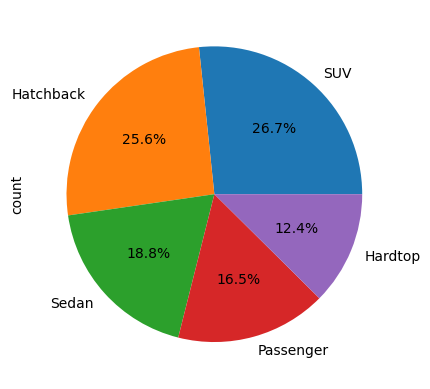

In [150]:
df1['Body Style'].value_counts().plot.pie(autopct = '%1.1f%%',color = 'coolwarm')
plt.show()

In [44]:
#Q6. How does the average selling price of cars vary by customer gender and annual income.

In [312]:
def income_range(num):
    if num in range(0,50000):
        return 'Very Low'
    elif num in range(50000,100000):
        return 'Low'
    elif num in range(100000,500000):
        return 'Medium'
    else:
        return "High"


In [314]:
df1['Annual Income'].unique()

array([  13500, 1480000, 1035000, ...,  374060, 4111000, 1369000],
      dtype=int64)

In [15]:
df1['Income category']= df1['Annual Income'].apply(income_range)

In [17]:
df1.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body Style,Phone,Dealer_Region,Income category
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Very Low
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,High


In [142]:
average_price = df1.groupby(['Gender','Income category'])['Price'].mean().reset_index()
average_price

,Gender,Income category,Price
0,Female,High,28288.535641
1,Female,Medium,28502.055062
2,Female,Very Low,28132.038732
3,Male,High,28053.885738
4,Male,Low,43000.000000
5,Male,Medium,28506.557505
6,Male,Very Low,27816.302247


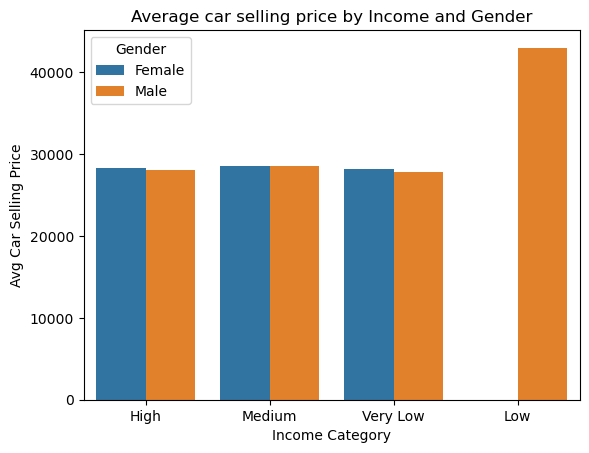

In [148]:
sns.barplot(x = 'Income category', y = 'Price', hue = 'Gender', data = average_price)
plt.title("Average car selling price by Income and Gender")
plt.xlabel("Income Category")
plt.ylabel("Avg Car Selling Price")
plt.show()

In [26]:
#Q7  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

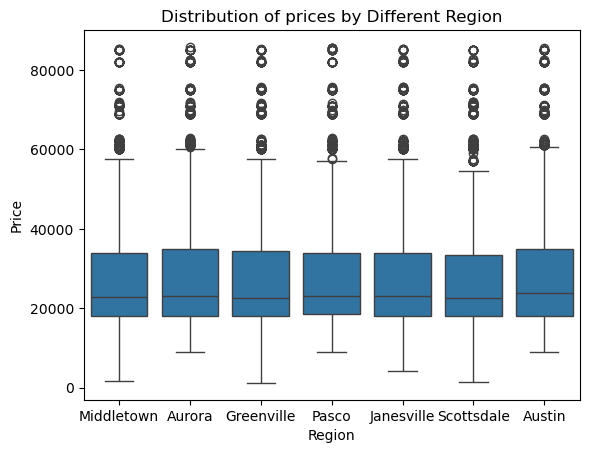

In [58]:
sns.boxplot(y  = 'Price',  x= 'Dealer_Region', data = df1)
plt.title('Distribution of prices by Different Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()

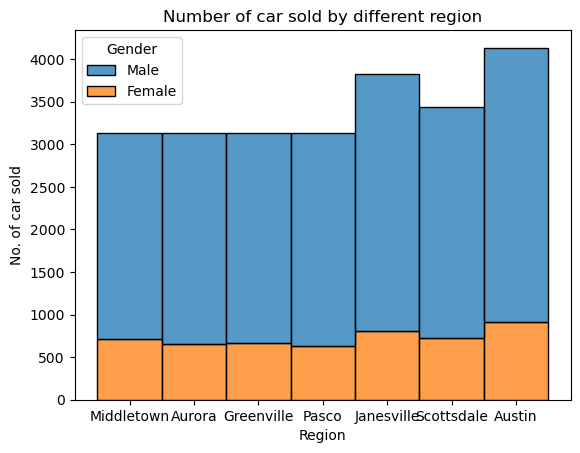

In [66]:
sns.histplot(x = 'Dealer_Region',  data = df1, hue = 'Gender', multiple = 'stack')
plt.title('Number of car sold by different region')
plt.xlabel('Region')
plt.ylabel('No. of car sold')
plt.show()

In [ ]:
#Q8. How does the average car price differ between cars with different engine sizes

In [73]:
df1.groupby(['Engine'])['Price'].mean().reset_index()

,Engine,Price
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


In [ ]:
#insight
# This will give you the average prices between differennt engines.

In [ ]:
#Q9. How do car prices vary based on the customer’s annual income bracket?

In [83]:
avg_car_price = df1.groupby(['Income category'])['Price'].mean().sort_values(ascending = False).reset_index()

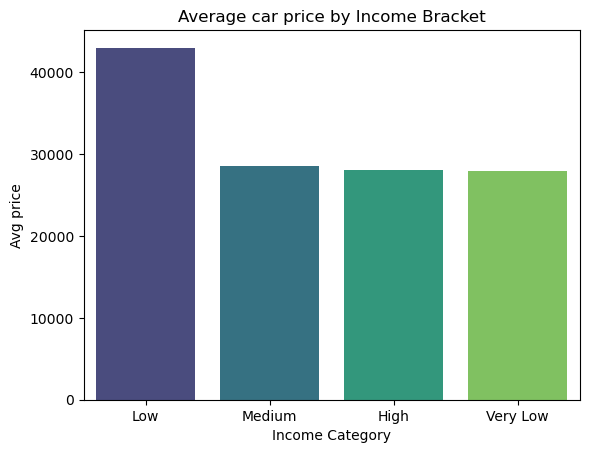

In [97]:
sns.barplot(x ='Income category', y ='Price', data = avg_car_price, palette='viridis')
plt.title('Average car price by Income Bracket')
plt.xlabel('Income Category')
plt.ylabel('Avg price')
plt.show()

In [123]:
#Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look
q1 = df1.groupby(['Model'])['Price'].count().sort_values(ascending = False).reset_index()
q1.columns = ['Model','Sales']
top_5= q1[:5]
top_5

,Model,Sales
0,Diamante,418
1,Silhouette,411
2,Prizm,411
3,Passat,391
4,Ram Pickup,383


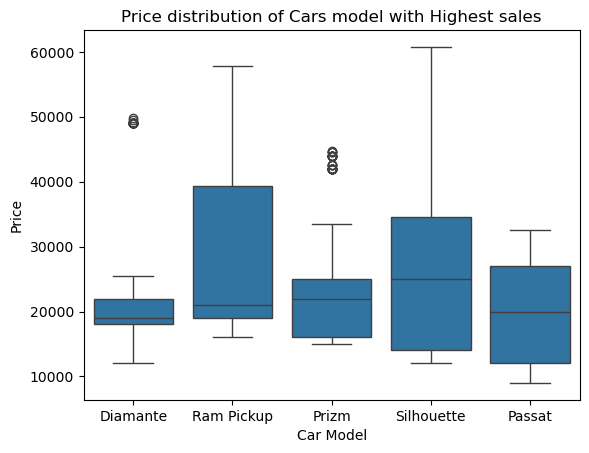

In [138]:
top_5_models = df1[df1['Model'].isin(top_5['Model'])]
sns.boxplot(x = 'Model', y = 'Price', data = top_5_models)
plt.title('Price distribution of Cars model with Highest sales')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.show()

In [142]:
#Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation ?
df1.groupby(['Engine','Color'])['Price'].mean().reset_index()

,Engine,Color,Price
0,DoubleÂ Overhead Camshaft,Black,25766.451103
1,DoubleÂ Overhead Camshaft,Pale White,30347.987460
2,DoubleÂ Overhead Camshaft,Red,27434.392314
3,Overhead Camshaft,Black,31732.967164
4,Overhead Camshaft,Pale White,24327.767694
5,Overhead Camshaft,Red,30153.405229


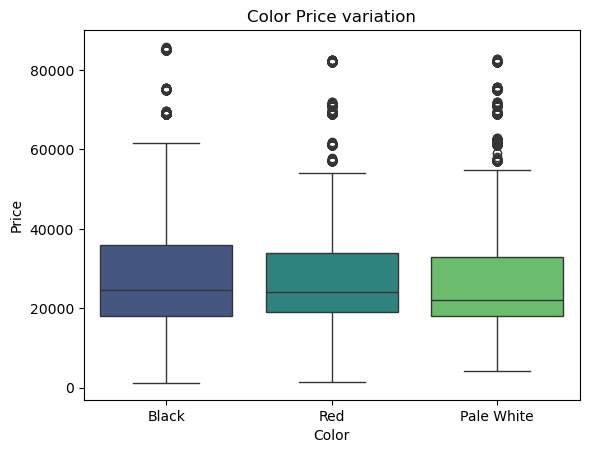

In [155]:
sns.boxplot(x = 'Color',y ='Price', data = df1, palette='viridis')
plt.title('Color Price variation')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

In [ ]:
#insight
# we can easily se that the height of black color box is more than other boxes, so black color has highest price variation

In [ ]:
#Q12. Is there any seasonal trend in car sales based on the date of sale?

In [19]:
df1['Date'] =pd.to_datetime(df1['Date'])

In [21]:
df1['Month'] = df1['Date'].dt.month

In [58]:
month_trend = df1.groupby(['Month'])['Car_id'].count().reset_index()

In [60]:
month_trend

,Month,Car_id
0,1,790
1,2,735
2,3,1535
3,4,1655
4,5,1895
5,6,1715
6,7,1725
7,8,1705
8,9,3305
9,10,1830


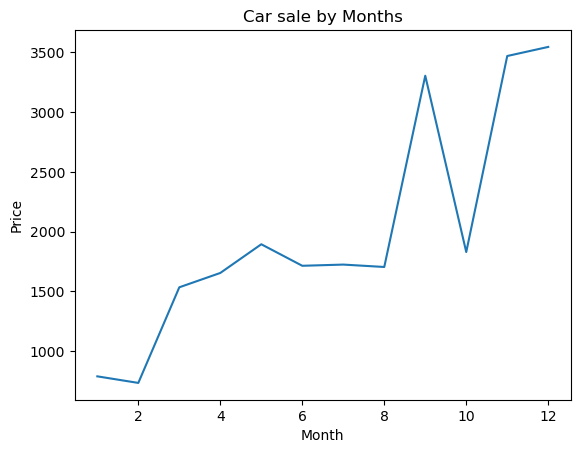

In [62]:
sns.lineplot(x = 'Month', y ='Car_id', data = month_trend, palette='viridis')
plt.title('Car sale by Months')
plt.xlabel('Month')
plt.ylabel('No of Sales')
plt.show()

In [ ]:
#insight
# From the line plot we can se that, from 8 month(August) we see increse in the sales of car.In last months of year
# people prefer buying the car. 

In [81]:
#Q13. How does the car price distribution change when considering different combinations of body style and transmission type ?
q13 = df1.groupby(['Transmission', 'Body Style'])['Price'].mean().reset_index()

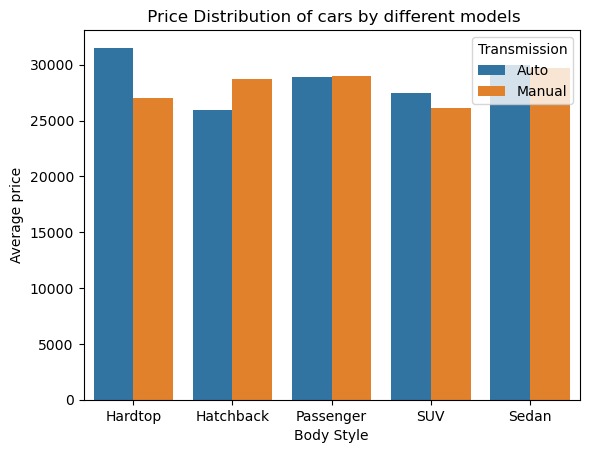

In [91]:
sns.barplot(x = 'Body Style',y = 'Price', data = q13, hue = 'Transmission', ci = True)
plt.title(' Price Distribution of cars by different models')
plt.xlabel('Body Style')
plt.ylabel('Average price')
plt.show()

In [410]:
#Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?


In [384]:
df1['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [364]:
df1['Size'] =  df1['Engine'].str.replace("Double Overhead Camshaft", '1')

In [388]:
df1['Engine Size'] = df1['Engine'].map({"DoubleÂ\xa0Overhead Camshaft": 1, 'Overhead Camshaft' : 2})

In [390]:
df1.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body Style,Phone,Dealer_Region,Engine Size
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,1
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2


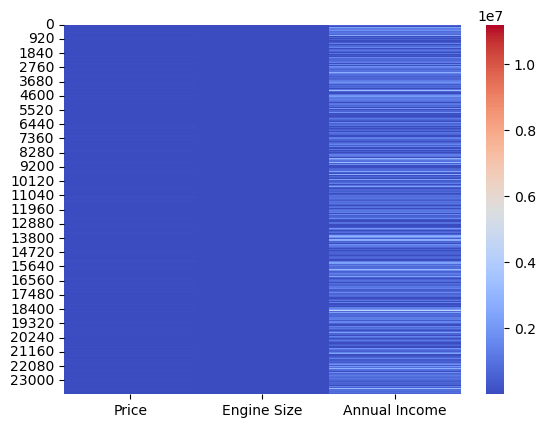

In [404]:
corr_data =  df1[['Price', 'Engine Size','Annual Income']]
sns.heatmap(corr_data,cmap='coolwarm')
plt.show()

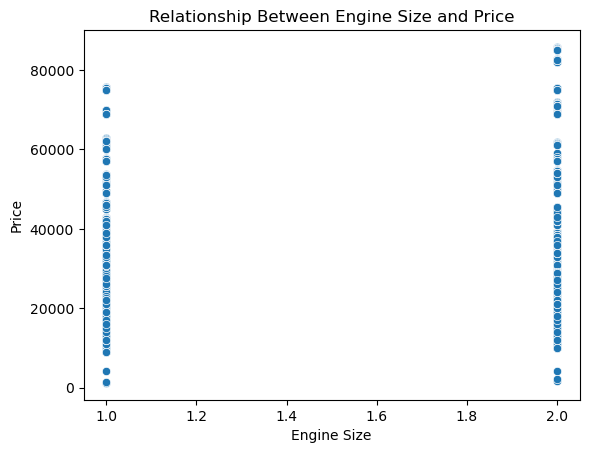

In [406]:
sns.scatterplot(x='Engine Size', y='Price', data=df1)
plt.title("Relationship Between Engine Size and Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

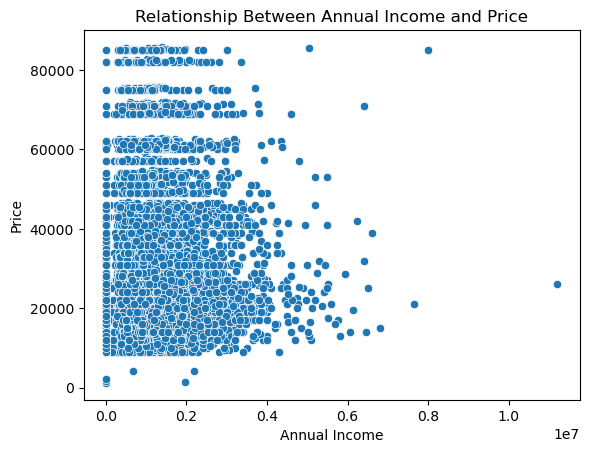

In [408]:
sns.scatterplot(x='Annual Income', y='Price', data=df1)
plt.title("Relationship Between Annual Income and Price")
plt.xlabel("Annual Income")
plt.ylabel("Price")
plt.show()

In [122]:
#Q15. How does the average car price vary across different car models and engine types?
q15 = df1.groupby(['Engine','Model'])['Price'].mean().reset_index()

In [138]:
q15

,Engine,Model,Price
0,DoubleÂ Overhead Camshaft,3-Sep,37986.380117
1,DoubleÂ Overhead Camshaft,3000GT,22764.326923
2,DoubleÂ Overhead Camshaft,300M,21394.888889
3,DoubleÂ Overhead Camshaft,323i,16744.632287
4,DoubleÂ Overhead Camshaft,328i,21069.149606
...,...,...,...
256,Overhead Camshaft,Viper,26052.375000
257,Overhead Camshaft,Voyager,33995.678322
258,Overhead Camshaft,Windstar,17100.272727
259,Overhead Camshaft,Wrangler,18742.942029


In [149]:
#EDA - 3 Amazon Data Sales

In [5]:
df3 = pd.read_csv('Amazon.csv')

In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [17]:
#Q1. What is the average rating for each product category

In [81]:
df3.rating.unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, nan, 2. , 2.6, 2.9])

In [79]:
df3['rating']=pd.to_numeric(df3['rating'], errors = 'coerce')

In [91]:
df3.groupby(['category'])['rating'].mean().reset_index()


,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [ ]:
#Q2. What are the top rating_count products by category

In [99]:
df3['rating_count'].unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

In [115]:
df3['rating_count']=df3['rating_count'].str.replace(",","")

In [123]:
df3['rating_count']=df3['rating_count'].astype(float)

In [131]:
max_ratingcount_category = df3.groupby(['category'])['rating_count'].max().sort_values(ascending= False).reset_index()
max_ratingcount_category

,category,rating_count
0,"Electronics|HomeTheater,TV&Video|Accessories|C...",426973.0
1,"Electronics|Headphones,Earbuds&Accessories|Hea...",363713.0
2,Electronics|Mobiles&Accessories|Smartphones&Ba...,313836.0
3,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,270563.0
4,Computers&Accessories|ExternalDevices&DataStor...,253105.0
...,...,...
206,Computers&Accessories|Components|InternalHardD...,362.0
207,Computers&Accessories|Laptops|TraditionalLaptops,323.0
208,Electronics|Mobiles&Accessories|MobileAccessor...,305.0
209,Electronics|HomeAudio|Speakers|TowerSpeakers,282.0


In [ ]:
#Q3. What is the distribution of discounted prices vs. actual prices?


In [150]:
df3['actual_price']=df3['actual_price'].str.replace("₹","").str.replace(',','')

In [158]:
df3['actual_price']= df3['actual_price'].astype(float)

In [181]:
df3.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [ ]:
df3['discounted_price']=df3['discounted_price'].str.replace("₹","").str.replace(',','')

In [170]:
df3['discounted_price']=df3['discounted_price'].astype(float)

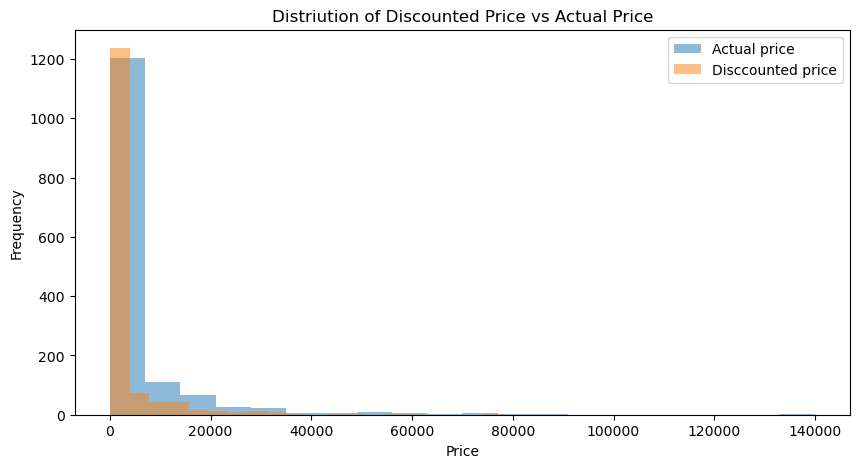

In [194]:
# for distribution of actual price and discounted we a make the seperate histogram
plt.figure(figsize=(10,5))
plt.hist(df3['actual_price'], bins= 20, alpha = 0.5, label = 'Actual price')
plt.hist(df3['discounted_price'],bins= 20, alpha = 0.5, label = 'Disccounted price')
plt.title('Distriution of Discounted Price vs Actual Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#Q4. How does the average discount percentage vary across categories?


In [215]:
df3.groupby(['category'])['discounted_price'].mean().sort_values(ascending = False).reset_index()


,category,discounted_price
0,"Home&Kitchen|Heating,Cooling&AirQuality|AirCon...",42990.000000
1,Computers&Accessories|Laptops|TraditionalLaptops,37247.000000
2,Computers&Accessories|Tablets,26999.000000
3,"Electronics|HomeTheater,TV&Video|Televisions|S...",24840.190476
4,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",23449.500000
...,...,...
206,Computers&Accessories|Accessories&Peripherals|...,99.000000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,95.000000
208,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,90.000000
209,Electronics|Mobiles&Accessories|MobileAccessor...,89.000000


In [242]:
#Q5. What are the most popular product names?

In [240]:
df3['product_name'].value_counts().sort_values(ascending = False).reset_index()

,product_name,count
0,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
1,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,4
2,Ambrane 2 in 1 Type-C & Micro USB Cable with 6...,3
3,Pinnaclz Original Combo of 2 Micro USB Fast Ch...,3
4,Portronics Konnect L POR-1081 Fast Charging 3A...,3
...,...,...
1332,"Borosil Rio 1.5 L Electric Kettle, Stainless S...",1
1333,Havells Ambrose 1200mm Ceiling Fan (Pearl Whit...,1
1334,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...",1
1335,Syska SDI-07 1000 W Stellar with Golden Americ...,1


In [ ]:
#insight 
# 0 index product is most popular

In [ ]:
#Q6.  What are the most popular product keywords?

In [256]:
keywords=df3['product_name'].str.split(expand  = True).stack()
keywords

0     0       Wayona
      1        Nylon
      2      Braided
      3          USB
      4           to
             ...    
1464  2    1000-Watt
      3        Grill
      4     Sandwich
      5        Maker
      6      (Black)
Length: 30247, dtype: object

In [274]:
popular_keywords = keywords.value_counts().reset_index()
popular_keywords.columns = ['Keyword','Count']
popular_keywords.head(15)

,Keyword,Count
0,with,718
1,for,614
2,|,457
3,&,432
4,USB,342
5,and,310
6,Cable,306
7,-,220
8,Charging,212
9,Fast,208


In [246]:
df3.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [293]:
#Q7.  What are the most popular product reviews?
popular_review=df3['review_content'].value_counts().reset_index()
popular_review.head(15)

,review_content,count
0,"I am not big on camera usage, personally. I wa...",8
1,Worked on iPhone 7 and didn’t work on iPhone X...,7
2,I ordered this cable to connect my phone to An...,7
3,"Good product,long wire,Charges good,Nice,I bou...",7
4,128GB SD Card is showing 134GBDon't buy this p...,6
5,I purchased the 6/128gb variant.To sum it up ...,6
6,"Everything is fine but it is bulky and hard, i...",5
7,Good budget mfi certified lightly cable for th...,5
8,About the TV - Wonderful----------------------...,5
9,[Update: Sept 29] boAt seems to have heard the...,5


In [303]:
#Q8. What is the correlation between discounted_price and rating?
corr = df3[['discounted_price','rating']].corr()

In [305]:
corr

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


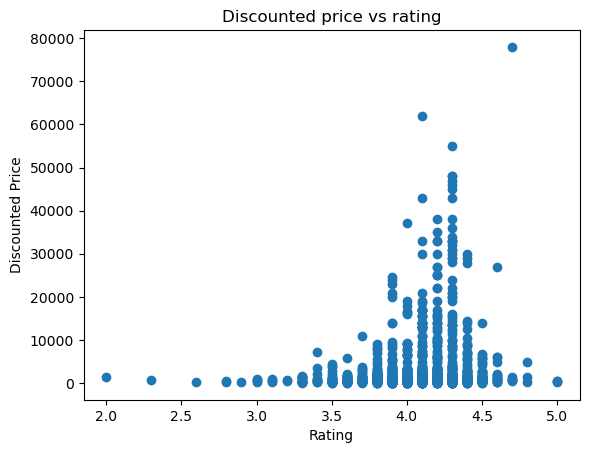

In [321]:
plt.scatter(y=df3['discounted_price'],x=df3['rating'])
plt.title("Discounted price vs rating")
plt.xlabel("Rating")
plt.ylabel('Discounted Price')
plt.show()

In [ ]:
#Q9.  What are the Top 5 categories based on the highest ratings?

In [338]:
df3.groupby(['category'])['rating'].max().sort_values(ascending = False).reset_index().head(5)

,category,rating
0,Computers&Accessories|Accessories&Peripherals|...,5.0
1,Computers&Accessories|Accessories&Peripherals|...,5.0
2,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8
3,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.8
4,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8


In [ ]:
#Q10. Identify any potential areas for improvement or optimization based on the data analysis.

In [344]:
df3.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [348]:
#discount_percentage is in object we have to change that in numeric
df3['discount_percentage'].unique()

array(['64%', '43%', '90%', '53%', '61%', '85%', '65%', '23%', '50%',
       '33%', '55%', '63%', '69%', '60%', '13%', '44%', '38%', '39%',
       '46%', '41%', '70%', '42%', '72%', '25%', '51%', '73%', '0%',
       '80%', '28%', '67%', '58%', '35%', '45%', '62%', '54%', '27%',
       '77%', '56%', '78%', '31%', '86%', '47%', '37%', '75%', '32%',
       '68%', '66%', '22%', '57%', '17%', '52%', '88%', '20%', '59%',
       '40%', '26%', '29%', '83%', '71%', '15%', '76%', '48%', '82%',
       '36%', '89%', '87%', '24%', '34%', '11%', '91%', '7%', '19%',
       '79%', '21%', '81%', '18%', '49%', '30%', '84%', '10%', '6%',
       '14%', '74%', '4%', '5%', '16%', '8%', '2%', '94%', '12%', '3%',
       '9%'], dtype=object)

In [354]:
df3['discount_percentage'] = df3['discount_percentage'].str.replace('%',"")

In [358]:
df3['discount_percentage']= df3['discount_percentage'].astype(int)

In [360]:
df3.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int32
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [364]:
df3.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [384]:
df3 = df3.fillna(0)

In [386]:
df3.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [390]:
df3.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int32
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [3]:
#EDA-4 SPotify

In [9]:
df4 = pd.read_csv('spotify.csv')

In [13]:
#Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
df4 = pd.read_csv('spotify.csv')

In [19]:
df4.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [43]:
df4.duplicated().sum()

27

In [47]:
df4 = df4.drop_duplicates()

In [49]:
df4.duplicated().sum()

0

In [ ]:
#Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.


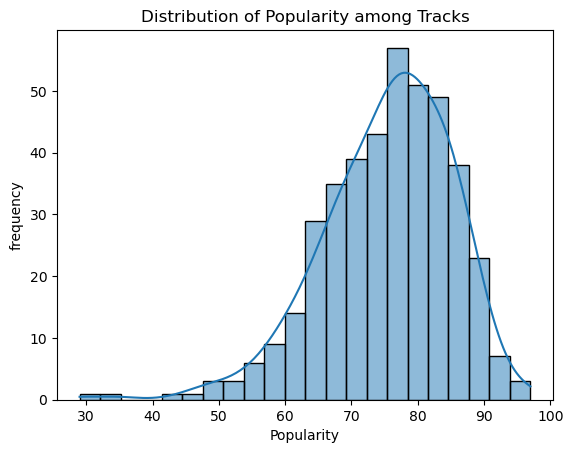

In [65]:
sns.histplot( x = 'Popularity',data =  df4,  kde = True)
plt.title('Distribution of Popularity among Tracks')
plt.xlabel('Popularity')
plt.ylabel('frequency')
plt.show()

In [ ]:
#Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

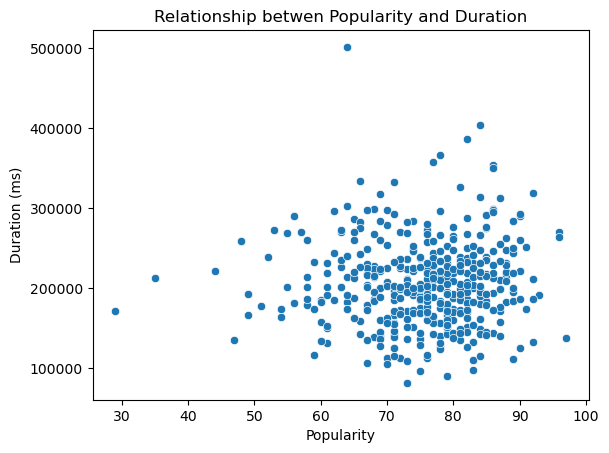

In [78]:
sns.scatterplot(x = 'Popularity', y = 'Duration (ms)', data = df4)
plt.title('Relationship betwen Popularity and Duration')
plt.show()

In [ ]:
#insight
# songs with less dusration and high duration has less popularity. Song has high popularity in ran of 1.5  to 2.5 minutes

In [ ]:
#Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.


In [93]:
q4= df4['Artist'].value_counts().sort_values(ascending =  False).reset_index().head(10)

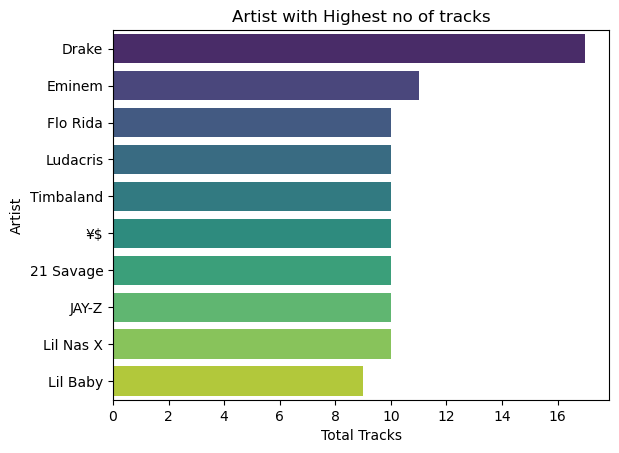

In [135]:
sns.barplot(y = 'Artist', x = 'count', data = q4, palette='viridis')
plt.title('Artist with Highest no of tracks')
plt.xlabel('Total Tracks')
plt.show()

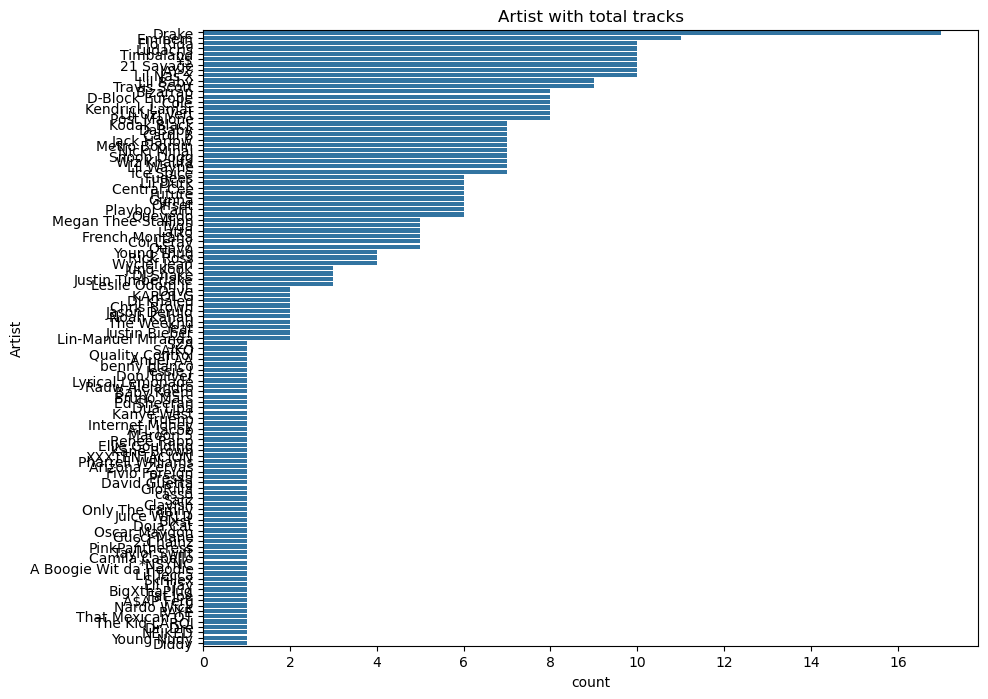

In [133]:
plt.figure(figsize=(10, 8)) 
sns.countplot(data=df4, y='Artist', order=df4['Artist'].value_counts().sort_values(ascending = False).index)
plt.title('Artist with total tracks')
plt.show()

In [153]:
#Q5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
top_least = df4.sort_values(by = 'Popularity',ascending = True).head()
top_least

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


In [151]:
top_least[['Artist', 'Track Name']]

,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
413,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix
407,Wyclef Jean,911 (feat. Mary J. Blige)


In [ ]:
#Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the 
  #  average popularity for each artist

In [187]:
avg_pop = df4.groupby(['Artist'])['Popularity'].mean().sort_values(ascending = False).reset_index()
top_art = avg_pop.head(5)
top_art

,Artist,Popularity
0,cassö,92.000000
1,Trueno,89.000000
2,David Guetta,87.000000
3,Travis Scott,86.555556
4,¥$,85.100000


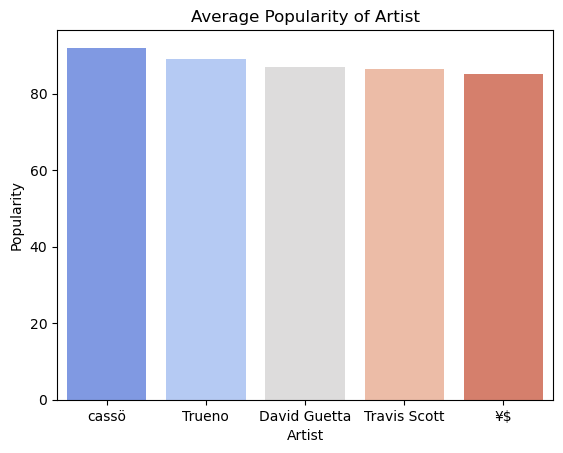

In [185]:

sns.barplot(x = 'Artist', y ='Popularity', data = top_art, palette='coolwarm')
plt.title('Average Popularity of Artist')
plt.show()

In [232]:
#Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [228]:
top_5_artist = df4.groupby(['Artist'])['Popularity'].mean().sort_values(ascending = False).head(5).index
top_5_artist

Index(['cassö', 'Trueno', 'David Guetta', 'Travis Scott', '¥$'], dtype='object', name='Artist')

In [236]:
# filter top artist records in dataset
filter_df = df4[df4['Artist'].isin(top_5_artist)]
filter_df

,Artist,Track Name,Popularity,Duration (ms),Track ID
7,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
31,Travis Scott,I KNOW ?,92,211582,6wsqVwoiVH2kde4k4KKAFU
32,Travis Scott,MY EYES,91,251249,4kjI1gwQZRKNDkw1nI475M
33,Travis Scott,goosebumps,89,243836,6gBFPUFcJLzWGx4lenP6h2
37,Travis Scott,SICKO MODE,87,312820,2xLMifQCjDGFmkHkpNLD9h
38,Travis Scott,TELEKINESIS (feat. SZA & Future),86,353754,1i9lZvlaDdWDPyXEE95aiq
140,cassö,Prada,92,132359,59NraMJsLaMCVtwXTSia8i
173,Travis Scott,SKITZO (feat. Young Thug),78,366592,0bkV1iQHSxBaksUqgEkcbc
200,David Guetta,Baby Don't Hurt Me,87,140017,3BKD1PwArikchz2Zrlp1qi


In [252]:
most_popular = filter_df.loc[filter_df.groupby(['Artist'])['Popularity'].idxmax()]

In [256]:
most_popular[['Artist', 'Track Name']]

,Artist,Track Name
200,David Guetta,Baby Don't Hurt Me
30,Travis Scott,FE!N (feat. Playboi Carti)
241,Trueno,Mamichula - con Nicki Nicole
140,cassö,Prada
260,¥$,CARNIVAL


In [ ]:
#Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

In [267]:
col =  ['Popularity', 'Duration (ms)']

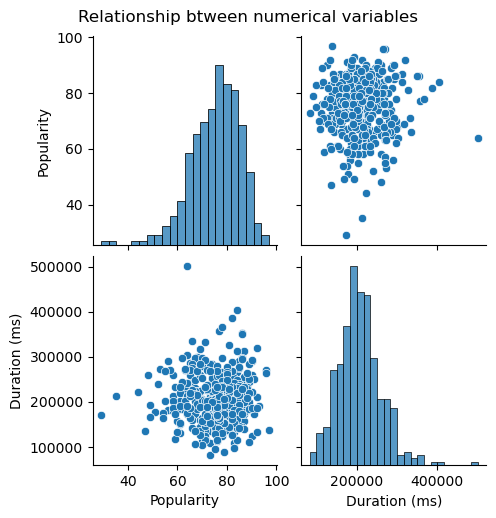

In [283]:
sns.pairplot(df4[col])
plt.suptitle("Relationship btween numerical variables", y  = 1.02)
plt.show()

In [ ]:
#Q9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

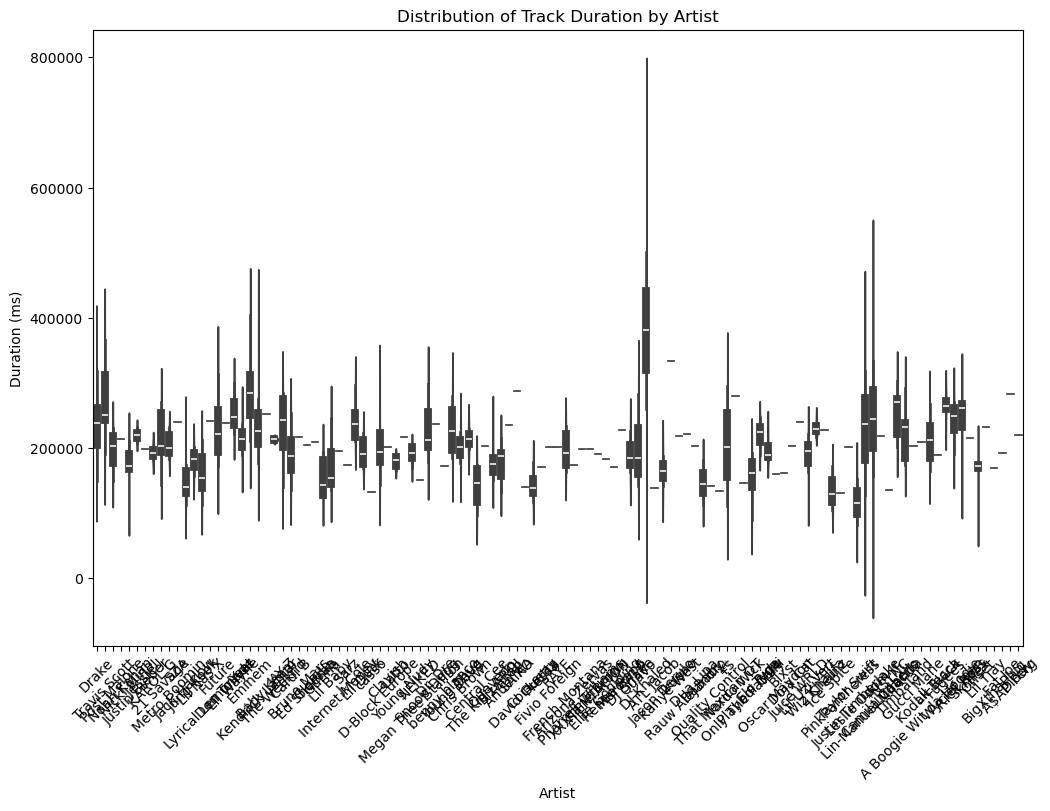

In [296]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = 'Artist', y = 'Duration (ms)', data = df4)
plt.title('Distribution of Track Duration by Artist')
plt.xticks(rotation=45) 
plt.show()

In [ ]:
#Q10.  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

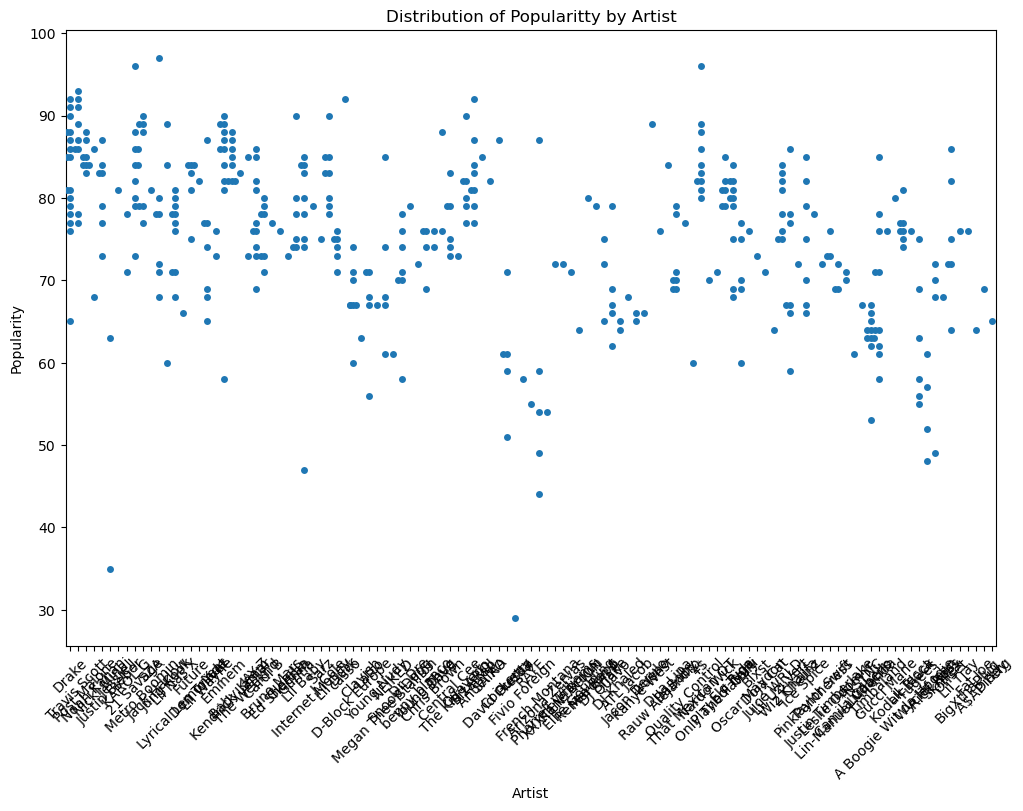

In [302]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x = 'Artist', y = 'Popularity', data = df4)
plt.title('Distribution of Popularitty by Artist')
plt.xticks(rotation=45) 
plt.show()